# ML Classification - KNN distances with Pokemons

## Objectif


- Maitriser les notions de distance
- Utiliser le KNN pour trouver des similarités

## Jouons avec l'algorithme

Le but du KNN est de prédire une catégorie, car c'est un algorithme de classification. Pour ce faire, l'algorithme fonctionne en 2 étapes :

1. trouver les plus proches voisins, c'est-à-dire les voisins avec la distance la plus faible.
2. chercher la classe (la catégorie) majoritaire parmi les voisins afin d'effectuer une prédiction

Dans ce challenge, nous aurons un usage très particulier du KNN. Nous allons uniquement utiliser la première étape. Nous aurons donc besoin d'entrainer le modèle (`.fit()`), mais pas besoin d'effectuer une prédiction. En effet, ce qui nous intéresse est la distance de nos voisins, pas leur catégorie.
Pour cela, scikit-learn a prévu une classe spécifique, sans target : `NearestNeighbors`.

## Distance

Avec scikit-learn, tu peux obtenir la distance d'un point avec chacun de ses plus proches voisins.

Dans cet exemple, nous créons un DataFrame avec seulement 2 lignes, et deux variables numériques.

In [2]:
import pandas as pd

df = pd.DataFrame(data = [[20,15, "A"], [30,8, "B"]],
             columns = ['X1', 'X2', 'target'],
             )

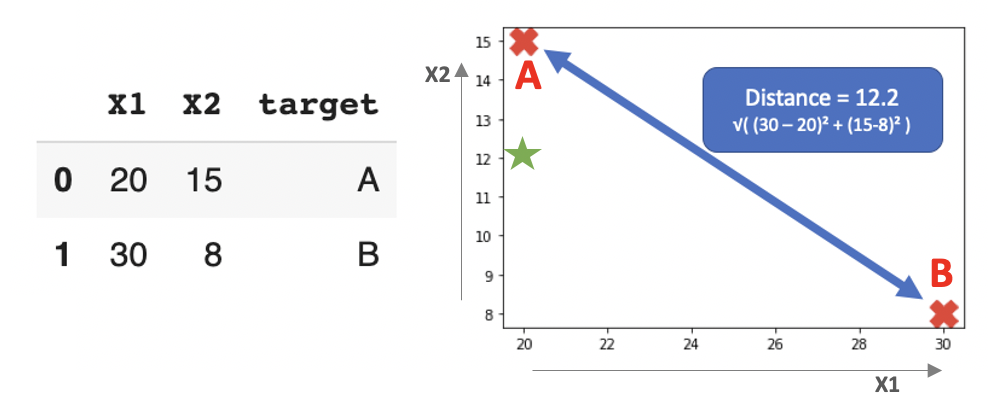

### Coordonnées pour 1 voisin

Commençons par entrainer notre modèle avec le paramètre `n_neighbors = 1`. Nous sélectionnons donc uniquement le voisin le plus proche. Puis, grâce à la fonction `kneighbors`, nous demandons à notre modèle de déterminer le voisin le plus proche de l'étoile verte présente sur le graphique, en mettant les coordonnées à la main :

In [3]:
from sklearn.neighbors import NearestNeighbors

X = df[['X1', 'X2']]

distanceKNN = NearestNeighbors(n_neighbors=1).fit(X)

distanceKNN.kneighbors([[20,12]])

c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[3.]]), array([[0]], dtype=int64))

> `(array([[3.]]), array([[0]]))`

La fonction `kneighbors` retourne alors 2 arrays NumPy :

- le premier array contient la distance du plus proche voisin (ici une distance de `3`, car une distance de 0 en abscisse et de 3 en ordonnée).
- le second array contient les indices des voisins, triés dans le même ordre que les distances. Ici nous cherchons un seul voisin, donc l'array contient un seul indice : 0, ce qui correspond au point A``. Sur le graphique, nous voyons bien qu'il s'agit du plus proche voisin de l'étoile verte.

Nous pourrions donc avoir son nom en sélectionnant le premier indice du second array, et en cherchant cet indice dans notre dataframe :

In [4]:
neighbors = distanceKNN.kneighbors([[20,12]])

df.iloc[neighbors[1][0][0]]

c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


X1        20
X2        15
target     A
Name: 0, dtype: object

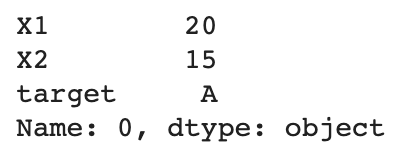

Nous cherchons maintenant le plus proche voisin d'un point présent dans le jeu d'entrainement :

In [5]:
distanceKNN.kneighbors(df.loc[df['target'] == 'A', ['X1', 'X2']])

(array([[0.]]), array([[0]], dtype=int64))

Le plus proche voisin d'une donnée du jeu d'entrainement est... lui-même ! En effet, avec une distance de 0, c'est clairement le plus proche.

`(array([[0.]]), array([[0]]))`

### Coordonnées pour 2 voisins ou plus


Nous modifions maintenant notre paramètre pour chercher les 2 plus proches voisins de l'étoile verte :

In [6]:
distanceKNN = NearestNeighbors(n_neighbors=2).fit(X)

distanceKNN.kneighbors([[20,12]])

c:\Users\benoi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[ 3.        , 10.77032961]]), array([[0, 1]], dtype=int64))

Chaque array comporte maintenant 2 valeurs, correspondant à chacun des voisins. Le plus proche voisin est toujours celui d'indice 0 avec une distance de 3, suivi de l'indice 1 avec une distance de 10.77.

`(array([[ 3.        , 10.77032961]]), 
 array([[0, 1]]))`

Nous cherchons maintenant les 2 plus proches voisins pour chacun des points du jeu d'entrainement :

In [8]:
# NearestNeighbors.kneighbors(X)
knn = NearestNeighbors(n_neighbors=2)

Chaque array comporte maintenant 2 colonnes et 2 lignes :

- Dans le premier array : pour chacun des deux points, le plus proche a une distance de 0 (lui-même), suivi d'une distance de 12.2.
- Dans le second array : Pour le point A, ses plus proches voisins sont celui d'indice 0, puis celui d'indice 1. Mais pour le point B, ses plus proches voisins sont inversés : celui d'indice 1, puis celui d'indice 0.

`(array([[ 0., 12.2],
        [ 0., 12.2]]), 
 array([[0, 1],
        [1, 0]]))`

> Les distances sont toujours en valeur absolue, il n'y a jamais de valeur négative. C'est plutôt logique. Que tu ailles de chez toi à la boulangerie, ou de la boulangerie à chez toi, tu marches 2 km. Ce n'est pas 2 km à l'aller et -2 km au retour. C'est pareil ici pour nos datas.

# Challenge - Attrapez-les tous


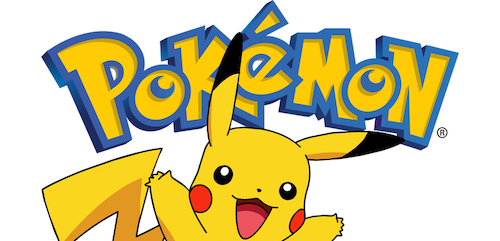

Un champion du monde Pokémon (oui, cela existe) a entendu parler de tes connaissances en Machine Learning et demande ton expertise.

Le champion a l'habitude d'utiliser les Pokemon suivants : [Mewtwo](https://bulbapedia.bulbagarden.net/wiki/Mewtwo_(Pok%C3%A9mon)), [Lugia](https://bulbapedia.bulbagarden.net/wiki/Lugia_(Pok%C3%A9mon)), [Rayquaza](https://bulbapedia.bulbagarden.net/wiki/Rayquaza_(Pok%C3%A9mon)), [Giratina](https://bulbapedia.bulbagarden.net/wiki/Giratina_(Pok%C3%A9mon)), [Dialga](https://bulbapedia.bulbagarden.net/wiki/Dialga_(Pok%C3%A9mon)), et [Palkia](https://bulbapedia.bulbagarden.net/wiki/Palkia_(Pok%C3%A9mon)). Mais pour sa prochaine compétition, il est interdit d'utiliser un Pokémon légendaire. Un pokemon est soit légendaire, soit non-légendaire. La dernière colonne du dataset indique True ou False suivant les cas.
Le champion devra donc remplacer ses Pokemon légendaires préférés par d'autres Pokémons non-légendaires, avec des caractéristiques similaires. C'est là que tu interviens !

Pour l'aider, suis les étapes suivantes :

1. Importe le dataset [pokemon.csv](https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/pokemon.csv). Chaque ligne représente un pokemon, avec ses différentes caractéristiques (attaque, défense, vitesse, etc...), ainsi que la colonne "légendaire".
2. Entraine l'algorithme NN en utilisant l'ensemble des colonnes numériques en variables explicatives X.

> - Les valeurs nulles (NaN) posent problème à l'ensemble des algorithmes. Ici, pour simplifier, tu peux supprimer la colonne concernée avant d'entrainer ton modèle.
> - Pas besoin de traintestsplit dans ce cas précis : en effet, sinon tu chercheras les voisins sur un sous-échantillon. Alors qu'il y a peut-être des voisins plus proche.
> - Pas besoin de predict ou de score non plus : nous calculons uniquement des distances.

3. Utilise la fonction `kneighbors()` pour trouver le ou les Pokémons le(s) plus proche(s) de chacun des Pokémon légendaires que le champion a l'habitude d'utiliser.
4. Fais des recommandations de Pokémon à utiliser par le champion pour sa prochaine compétition, en lui priorisant par distance. Evidemment, ta recommandation ne doit pas indiquer un autre pokemon légendaire, même si ce dernier est très proche...

In [10]:
import pandas as pd

pokemon_df = pd.read_csv("https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/pokemon.csv")

pokemon_df.head()


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [14]:
pokemon_df = pokemon_df.drop(columns=['Type 2'])

X = pokemon_df.select_dtypes(include='number')

knn = NearestNeighbors(n_neighbors=3)

knn.fit(X)

distances, indices = knn.kneighbors(X)

In [28]:
legendary_pokemon = pokemon_df[pokemon_df['Legendary'] == False]

# Utiliser la méthode kneighbors pour trouver les 2 plus proches voisins pour chaque Pokémon légendaire
distances, indices = knn.kneighbors(legendary_pokemon[X.columns])

for i, legendary_pokemon_name in enumerate(legendary_pokemon['Name']):
    closest_pokemon_names = pokemon_df.loc[indices[i], 'Name'].tolist()
    print(f"Les Pokémon les plus proches de {legendary_pokemon_name} sont : {closest_pokemon_names}")
    print("\n")

Les Pokémon les plus proches de Bulbasaur sont : ['Bulbasaur', 'Squirtle']


Les Pokémon les plus proches de Ivysaur sont : ['Ivysaur', 'Wartortle']


Les Pokémon les plus proches de Venusaur sont : ['Venusaur', 'Blastoise']


Les Pokémon les plus proches de Mega Venusaur sont : ['Mega Venusaur', 'Mega Blastoise']


Les Pokémon les plus proches de Charmander sont : ['Charmander', 'Bulbasaur']


Les Pokémon les plus proches de Charmeleon sont : ['Charmeleon', 'Ivysaur']


Les Pokémon les plus proches de Charizard sont : ['Charizard', 'Venusaur']


Les Pokémon les plus proches de Mega Charizard X sont : ['Mega Charizard X', 'Mega Blastoise']


Les Pokémon les plus proches de Mega Charizard Y sont : ['Mega Charizard Y', 'Mega Blastoise']


Les Pokémon les plus proches de Squirtle sont : ['Squirtle', 'Bulbasaur']


Les Pokémon les plus proches de Wartortle sont : ['Wartortle', 'Ivysaur']


Les Pokémon les plus proches de Blastoise sont : ['Blastoise', 'Venusaur']


Les Pokémon les plus pro

In [27]:

def filter_non_legendary_neighbors(legendary_pokemon_name, distances, indices, pokemon_df):
    non_legendary_neighbors = []

    for i, _ in enumerate(legendary_pokemon['Name']):
        non_legendary_indices = [index for index in indices[i] if not pokemon_df.loc[index, 'Legendary']]

        non_legendary_indices = [index for index in non_legendary_indices if index != i]

        # Vérifier si la liste des indices non légendaires n'est pas vide
        if non_legendary_indices:
            # Ajouter le Pokémon non légendaire le plus proche à la liste
            non_legendary_neighbors.append(pokemon_df.loc[non_legendary_indices[0], 'Name'])
        else:
            non_legendary_neighbors.append("Aucun voisin non légendaire trouvé")

    return non_legendary_neighbors

for i, legendary_pokemon_name in enumerate(legendary_pokemon['Name']):
    non_legendary_neighbors = filter_non_legendary_neighbors(legendary_pokemon_name, distances, indices, pokemon_df)
    
    print(f"Recommandations pour {legendary_pokemon_name} : {non_legendary_neighbors}")
    print("\n")


Recommandations pour Articuno : ['Meganium', 'Typhlosion', 'Typhlosion', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Sceptile', 'Celebi', 'Celebi', 'Aucun voisin non légendaire trouvé', 'Mega Swampert', 'Relicanth', 'Milotic', 'Dusclops', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Metagross', 'Mega Salamence', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Mega Absol', 'Mega Absol', 'Bastiodon', 'Infernape', 'Cresselia', 'Manaphy', 'Electivire', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Manaphy', 'Mega Gallade', 'Cresselia', 'Aucun voisin non légendaire trouvé', 'Aucun voisin non légendaire trouvé', 'Manaphy', 'Aucun voisin non lége